In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import lib.preprocessing as pre

In [3]:
import lib.effects as fx

In [4]:
import librosa

In [5]:
path = '../Downloads/audio_data'

In [6]:
files = pre.full_file_scraper(path)

In [7]:
signals = [librosa.load(file)[0] for file in files]

In [8]:
bins = [0, 300, 1200, 2400, 5000, 10000, 20000]

In [9]:
EQ_dict = {"n_fft": 1024, "window_size":1024, "hop_length":1024,
          "peak": -12, "bins": bins, "roll_percent": 0.95, "seconds":10,
          "rank_threshold":10, "max_n":3, "min_overlap_ratio": 0.1, "max_eq":3}

In [10]:
f0 = fx.EQSignal(path=files[0], signal=signals[0], n_fft=EQ_dict["n_fft"], 
                 window_size=EQ_dict["window_size"], hop_length=EQ_dict["hop_length"], 
                 peak=EQ_dict["peak"], bins=EQ_dict["bins"], 
                 roll_percent=EQ_dict["roll_percent"], seconds=EQ_dict["seconds"], 
                 rank_threshold=EQ_dict["rank_threshold"], max_n=EQ_dict["max_n"], 
                 min_overlap_ratio=EQ_dict["min_overlap_ratio"], max_eq=EQ_dict["max_eq"])

In [13]:
f0.norm_fft_db[0][0:5]

array([54.05466 , 54.038883, 54.097702, 54.080185, 54.066578],
      dtype=float32)

In [11]:
f1 = fx.EQSignal(path=files[1], signal=signals[1], n_fft=EQ_dict["n_fft"], 
                 window_size=EQ_dict["window_size"], hop_length=EQ_dict["hop_length"], 
                 peak=EQ_dict["peak"], bins=EQ_dict["bins"], 
                 roll_percent=EQ_dict["roll_percent"], seconds=EQ_dict["seconds"], 
                 rank_threshold=EQ_dict["rank_threshold"], max_n=EQ_dict["max_n"], 
                 min_overlap_ratio=EQ_dict["min_overlap_ratio"], max_eq=EQ_dict["max_eq"])

f2 = fx.EQSignal(path=files[2], signal=signals[2], n_fft=EQ_dict["n_fft"], 
                 window_size=EQ_dict["window_size"], hop_length=EQ_dict["hop_length"], 
                 peak=EQ_dict["peak"], bins=EQ_dict["bins"], 
                 roll_percent=EQ_dict["roll_percent"], seconds=EQ_dict["seconds"], 
                 rank_threshold=EQ_dict["rank_threshold"], max_n=EQ_dict["max_n"], 
                 min_overlap_ratio=EQ_dict["min_overlap_ratio"], max_eq=EQ_dict["max_eq"])

f3 = fx.EQSignal(path=files[3], signal=signals[3], n_fft=EQ_dict["n_fft"], 
                 window_size=EQ_dict["window_size"], hop_length=EQ_dict["hop_length"], 
                 peak=EQ_dict["peak"], bins=EQ_dict["bins"], 
                 roll_percent=EQ_dict["roll_percent"], seconds=EQ_dict["seconds"], 
                 rank_threshold=EQ_dict["rank_threshold"], max_n=EQ_dict["max_n"], 
                 min_overlap_ratio=EQ_dict["min_overlap_ratio"], max_eq=EQ_dict["max_eq"])

In [13]:
fx0 = f0.eq_params([f1, f2, f3])

In [14]:
x0 = f0.equalization(fx0, Q=2)

Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

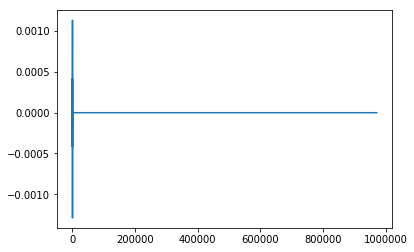

In [16]:
plt.plot(x0)

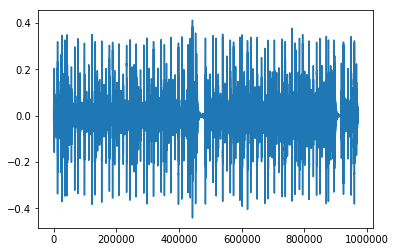

In [17]:
plt.plot(f0.signal)

In [14]:
x0

array([-0.0000000e+00, -2.0662928e-06,  6.8900144e-06, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

In [15]:
f0.signal

array([-0.0274692 , -0.00899946,  0.01513943, ...,  0.00727806,
       -0.00304722, -0.00551172], dtype=float32)

In [15]:
import IPython.display as ipd

In [16]:
ipd.Audio(x0, rate=44100)

In [ ]:
x0

In [13]:
f1.eq_params([f0, f2, f3])

0.0
0.0
0.0


[[18445.559624851816, 0.71, 2], [300, 0.71, 1]]

In [14]:
f2.eq_params([f0, f1, f3])

0.0
0.0
0.0


[[12169.844851076792, 0.71, 2], [300, 0.71, 1]]

In [ ]:
f3.eq_params([f0, f1, f2])

In [14]:
type(EQ_dict["max_n"])

int

In [8]:
cutoffs = [35, 80, 187.5, 375, 750, 1500, 3000, 6000]

In [9]:
pan_dict = {"n_fft": 1024, "window_size":1024, "hop_length":1024,
          "peak": -12, "cutoffs": cutoffs, "window":0.1, "order":2,
            "btype": "low"}

In [10]:
p0 = fx.PanSignal(path=files[0], signal=signals[0], n_fft=pan_dict["n_fft"], 
               window_size=pan_dict["window_size"], hop_length=pan_dict["hop_length"], 
               peak=pan_dict["peak"], cutoffs=pan_dict["cutoffs"], window=pan_dict["window"],
              order=pan_dict["order"], btype=pan_dict["btype"])

In [12]:
p0.lead_filter()

1500

In [11]:
p1 = fx.PanSignal(path=files[1], signal=signals[1], n_fft=pan_dict["n_fft"], 
               window_size=pan_dict["window_size"], hop_length=pan_dict["hop_length"], 
               peak=pan_dict["peak"], cutoffs=pan_dict["cutoffs"], window=pan_dict["window"],
              order=pan_dict["order"], btype=pan_dict["btype"])
p2 = fx.PanSignal(path=files[2], signal=signals[2], n_fft=pan_dict["n_fft"], 
               window_size=pan_dict["window_size"], hop_length=pan_dict["hop_length"], 
               peak=pan_dict["peak"], cutoffs=pan_dict["cutoffs"], window=pan_dict["window"],
              order=pan_dict["order"], btype=pan_dict["btype"])
p3 = fx.PanSignal(path=files[3], signal=signals[3], n_fft=pan_dict["n_fft"], 
               window_size=pan_dict["window_size"], hop_length=pan_dict["hop_length"], 
               peak=pan_dict["peak"], cutoffs=pan_dict["cutoffs"], window=pan_dict["window"],
              order=pan_dict["order"], btype=pan_dict["btype"])

In [12]:
signal_peaks = [x.lead_filter() for x in [p0, p1, p2, p3]]

In [16]:
signal_peaks

[1500, 375, 80, 750]

In [23]:
import numpy as np

In [20]:
K = np.unique(signal_peaks, return_inverse=True, return_counts=True)

In [28]:
K[2][0]

1

In [26]:
np.argwhere(K[1] == 3)[0][0]

0

In [35]:
list(np.argwhere(np.array(signal_peaks) == 750)[0])

[3]

In [14]:
sg = fx.SignalAggregator(44100, 4)

In [18]:
sg.panning_locations(cutoffs, signal_peaks)

1
0
1
0


IndexError: index 1 is out of bounds for axis 0 with size 1

In [21]:
range(0)

range(0, 0)

In [24]:
np.arange(1)

array([0])

In [25]:
for i in np.arange(1):
    print(i)

0
